<a href="https://colab.research.google.com/github/lskywolfll/Red-Neuronal/blob/master/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

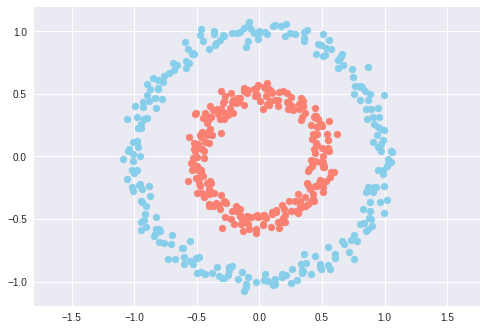

In [0]:
# CREAR EL DATASET

#Numero de registro de nuestros datos
n = 500
#Cuantas caracteristicas tenemos de nuestros datos (en este caso son 2)
p = 2

#Factor = a la distancia entre los circulos, noise = ruido(puntos)
X, Y = make_circles(n_samples = n, factor= 0.5, noise=0.05)

#todos los valores y Añadir nueva dimension 
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
#Equal es igual a los ejes con la misma proporcion 
plt.axis("equal")
plt.show()

In [0]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
  
  def __init__(self, n_conn, n_neur, act_f):
    #funcion de activacion de la capa (self ^) y poder usarlo para poder iniciar la funcion de la capa
    self.act_f = act_f 
    #Vector que se refiera al parametro de baias(English) y cantidad de parametros de nuestras neuronas
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    #Matriz W (cosas u objetos)
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    

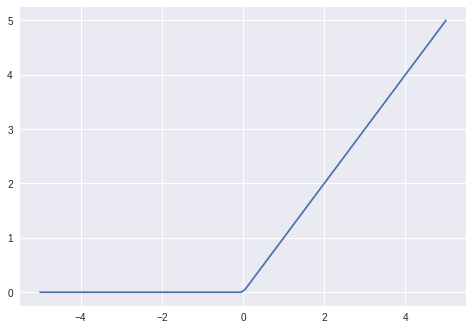

In [0]:
# FUNCIONES DE ACTIVACION

#lambda = funcion anonima en python para hacer algunas ejecuciones y funcion sigmoide
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))
#^^ despues de la primera funcion viene la derivada de esta para el gradiente

#Funcion Relu
relu = lambda x: np.maximum(0, x)

#-5 a 5 es una forma lineal y cantidad de valores
#Comienzos osea => start, stop, cantidad, viendo la propiedad con ? se ven otros parametros opcionales dependiendo de la complejidad de lo que vayamos a crear
_x = np.linspace(-5 , 5, 100)
plt.plot(_x, relu(_x))

In [0]:
#Capa 0 de la red neuronal
   #parametros, neuronas, funcion
l0 = neural_layer(p, 4, sigm)
#parametros son 4 de acuerdo a las neuronas definidas en la primera capa
l1 = neural_layer(4, 8, sigm)
#...

#No es necesario que todas las capas tengan la misma funcion
def create_nn(topology, act_f):
  #La funcion enumerate nos da el indice y el objeto (video time= 27:41)
  #nn = neural network
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    #Tantas neuronas que tengan l + 1, capa oculta a la primera 4 neuroas por p
    nn.append(neural_layer(topology[l], topology[l + 1], act_f))
    
  return nn

In [0]:
#Numeros de neuronas que va a tener nuestra red y la ultima es 1 por ser la neurona de salida (resultados binaros 0 o 1)
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

#Como el error cuadratico medio, diferencia entre valor predicho y el real (derivada)
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    #None y X por que no se permitia introducir datos aceptable se introdujeron datos para que este las procesara de manera correcta
    out = [(None, X)]

    #Forward Pass(pasarlo capa tras capa de las neuronas)
    for l, layer in enumerate(neural_net):

      #Suma Ponderada multiplicado matriz mente
      z = out[-1][1] @ neural_net[l].W + neural_net[l].b
      #Activacion
      a = neural_net[l].act_f[0](z)
      #Introducir dato al objeto out siendo la suma ponderada y la activacion
      out.append((z, a))
    
    if train:
      
      #Backward pass
      deltas = []
      #Len es lo que nos da todos los objetos dentro de neural_net u array, tambien la propiedad de revertir todo el rango de la columna 0 y neural_net
      for l in reversed(range(0, len(neural_net))):
        
        z = out[l + 1][0]
        a = out[l + 1][1]
        
        if l == len(neural_net) - 1:
          #Calcular Delta ultima capa NT: video min 54:03
          deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
        else: 
          #Calcular delta respecto a capa previa
          deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
        #baias en este caso no es nesaria declarar l + 1 ya que solo l ya esta hecha con ello por declararse en el codigo ya estaba hecha de esta manera
        _W = neural_net[l].W 
      
        #Gradient descent
        neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
        neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    #Suma ponderada -1 y activacion 1
    return out[-1][1]
  
train(neural_net, X, Y, l2_cost, 0.5)
print("")

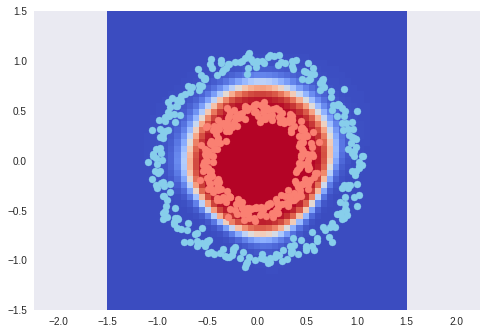

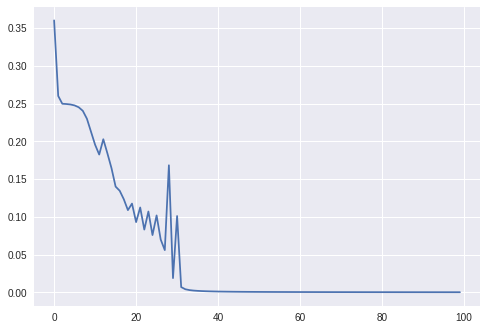

In [0]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

#Nueva red neuronal
neural_n = create_nn(topology, sigm)

#El Coste para obtener el dato
loss = []

#Iterar muchas veces el entrenamiento
for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  #Cada 25 iteraciones
  if i % 25 == 0:
    
    print(pY)
    #Calcular el coste y agrega un objeto al final usando la propiedad append(reservada del lenguaje)
    loss.append(l2_cost[0](pY, Y))
    #Resolucion
    res = 50
    #Malla de 50 x 50 osea lo que contendra nuestros datos de fondo se vera
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        #Prediccion y por que es una prediccion es falso(rojo y azul)
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    
    #Visualizacion mostrada e ejecutando aqui
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
    #Borrar el contenido y volver a dibujarlo con los colores
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  

In [0]:
np.zeros?